# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations/Trends:
* According to the linear regression there's no strong relation between Humidity, Cloudiness, and Wind Speed in both the Northern and Southern Hemisphere against the respective latitude the cities are located.
* As the position moves closer to the equator, the average temperature rises. So the temperatures of the cities closest the equator or 0 latitude is warmest, then get cooler as move away from equator.
* The Northern Hemisphere - Temperature v Latitude plot shows a strong negative relationship. Temperatures are the warmest when the cities are closer to the equator, and vise versa.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import gmaps
import random
import urllib
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [3]:
# citypy library - to Look up for city names with geo-coordinates
from citipy import citipy 
cities = []

while len(cities)<600:
    x = (random.choice(range(-90,90))) 
    y = (random.choice(range(-180,180))) 
    city = citipy.nearest_city(x,y).city_name 
    if city not in cities:
        cities.append(city)

len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Build URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = weather_api_key
settings = {"units": "imperial", "appid": weather_api_key}
url = f"{url}appid={weather_api_key}&units={units}"

url

'https://api.openweathermap.org/data/2.5/weather?appid=a30900a3db167d4b968004121034207b&units=imperial'

In [5]:
# List of city data
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
https://api.openweathermap.org/data/2.5/weather?appid=a30900a3db167d4b968004121034207b&units=imperial&q=thompson
Processing Record 2 of Set 1 | mecca
https://api.openweathermap.org/data/2.5/weather?appid=a30900a3db167d4b968004121034207b&units=imperial&q=mecca
Processing Record 3 of Set 1 | guerrero negro
https://api.openweathermap.org/data/2.5/weather?appid=a30900a3db167d4b968004121034207b&units=imperial&q=guerrero%20negro
Processing Record 4 of Set 1 | busselton
https://api.openweathermap.org/data/2.5/weather?appid=a30900a3db167d4b968004121034207b&units=imperial&q=busselton
Processing Record 5 of Set 1 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?appid=a30900a3db167d4b968004121034207b&units=imperial&q=hithadhoo
Processing Record 6 of Set 1 | namibe
https://api.openweathermap.org/data/2.5/weather?appid=a30900a3db167d4b968004121034207b&units=imperial&q=namibe
Processing Rec

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,57.38,75,86,6.35,ZA,1655686374
1,rikitea,-23.1203,-134.9692,72.07,66,91,22.82,PF,1655686375
2,atar,20.5169,-13.0499,80.22,63,95,5.12,MR,1655686375
3,iqaluit,63.7506,-68.5145,51.53,46,75,17.27,CA,1655686376
4,hermanus,-34.4187,19.2345,43.81,84,0,11.10,ZA,1655686377


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert array of JSONs into Pandas DataFrame
weatherpy_df = pd.DataFrame(city_data)

# save to csv file
weatherpy_df.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Display the count of cities of weather data
weatherpy_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [7]:
# Display the data frame
weatherpy_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,66.36,77,75,9.22,CA,1655713293
1,mecca,21.4267,39.8261,98.56,31,54,13.89,SA,1655713116
2,guerrero negro,27.9769,-114.0611,63.23,84,0,10.63,MX,1655713295
3,busselton,-33.6500,115.3333,63.75,76,59,10.42,AU,1655713295
4,hithadhoo,-0.6000,73.0833,83.89,69,71,10.22,MV,1655713296


In [8]:
#Display a statistical overview
weatherpy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,19.143319,20.591751,68.391561,68.923775,54.519056,8.048040,1.655713e+09
std,33.724357,93.315052,15.534674,21.892498,40.247000,5.275475,9.975864e+01
min,-54.800000,-179.166700,30.270000,1.000000,0.000000,0.000000,1.655713e+09
25%,-9.038150,-63.328200,57.055000,56.500000,6.500000,3.970000,1.655713e+09
50%,21.461200,26.400000,71.530000,74.000000,64.000000,6.960000,1.655713e+09
75%,47.919050,106.790700,79.830000,86.000000,99.000000,11.130000,1.655714e+09
max,78.218600,179.316700,111.180000,100.000000,100.000000,28.830000,1.655714e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

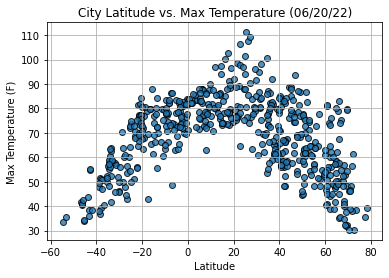

In [9]:
# Build scatter plot for latitude vs temperature
plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Display plot
plt.show()

The code is analyzing the highest temperature in each sample city, based on their latitude.
Temperatures get warmer as we move closer to equator or Latitude 0.

## Latitude vs. Humidity Plot

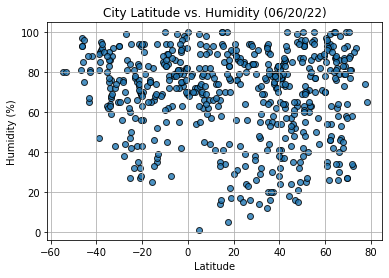

In [10]:
# Build the scatter plots for each city types
plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Display plot
plt.show()

The code is analyzing the Humidity percentage recorded in the sample cities based on their latitude.
No obvious trend/relation.

## Latitude vs. Cloudiness Plot

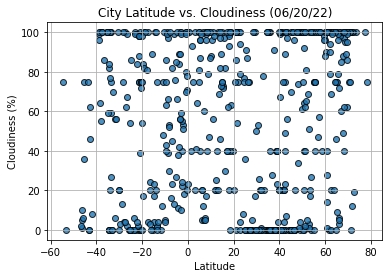

In [11]:
# Build the scatter plots for each city types
plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Display plot
plt.show()

The code is analyzing the Cloudiness percentage recorded in the sample cities based on their latitude. 
No obvious trend/relation.

## Latitude vs. Wind Speed Plot

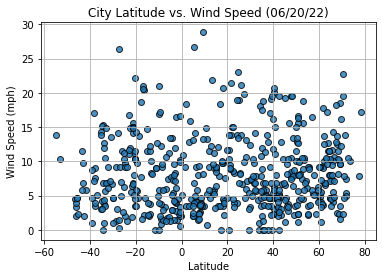

In [12]:
# Build the scatter plots for each city types
plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Display plot
plt.show()

The code is analyzing the Wind Speed recorded in the sample cities based on their latitude. 
No obvious trend/relation.

## Linear Regression

In [13]:
northern_hemishphere = weatherpy_df.loc[weatherpy_df["Lat"] >= 0]
southern_hemishphere = weatherpy_df.loc[weatherpy_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.54x+91.42
The r-squared correlation coefficient for this line is -0.68


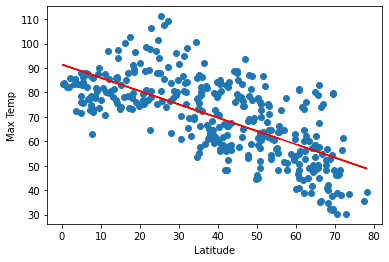

<Figure size 432x288 with 0 Axes>

In [14]:
x_axis = northern_hemishphere["Lat"]
y_axis = northern_hemishphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))

plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The linear regressions shows the relationship between the maximum temperature of cities and their latitude in the northern hemisphere. 
The relationship is negative and strong, meaning the further the city is away from 0 latitude or the equator the cooler its temperature is in the northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.83x+82.36
The r-squared correlation coefficient for this line is 0.80


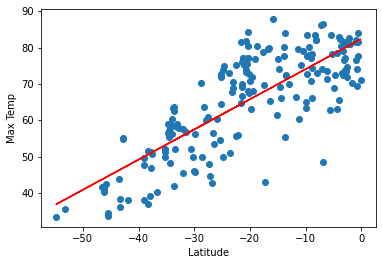

<Figure size 432x288 with 0 Axes>

In [15]:
x_axis = southern_hemishphere["Lat"]
y_axis = southern_hemishphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))

plt.show()

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The linear regressions shows the relationship between the maximum temperature of cities and their latitude in the southern hemisphere. 
The relationship is positive and strong, meaning the closer the city is from 0 latitude or the equator the warmer its temperature is in the southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.05x+64.64
The r-squared correlation coefficient for this line is 0.04


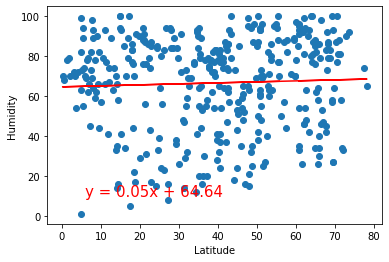

<Figure size 432x288 with 0 Axes>

In [16]:
x_axis = northern_hemishphere["Lat"]
y_axis = northern_hemishphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))

plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The linear regression shows the relationship between the humidity percentage of cities and their latitude in the northern hemisphere. The relationship between Humidity and Latitude is positive, but very weak, meaning there is no significance change to a cities humidity percentage and its location north of the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.03x+72.82
The r-squared correlation coefficient for this line is -0.02


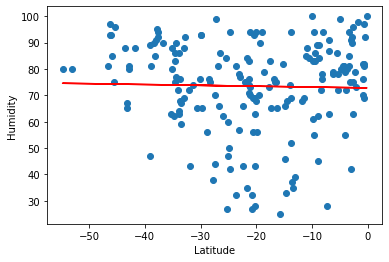

<Figure size 432x288 with 0 Axes>

In [17]:
x_axis = southern_hemishphere["Lat"]
y_axis = southern_hemishphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))

plt.show()

# Save the figure
plt.savefig("Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The linear regression shows the relationship between the humidity percentage of cities and their latitude in the southern hemisphere. The relationship between Humidity and Latitude is negative, but weak, meaning there is no significance change to a cities humidity percentage and its location south of the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.18x+48.69
The r-squared correlation coefficient for this line is 0.09


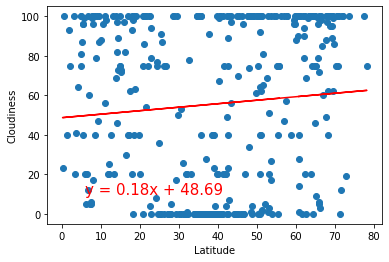

<Figure size 432x288 with 0 Axes>

In [18]:
x_axis = northern_hemishphere["Lat"]
y_axis = northern_hemishphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))

plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The linear regression shows the relationship between the cloudiness percentage of cities and their latitude in the northern hemisphere. The relationship between Cloudiness and Latitude is positive, but weak, meaning there is no significance change to a cities cloudiness percentage and its location north of the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.30x+58.58
The r-squared correlation coefficient for this line is 0.11


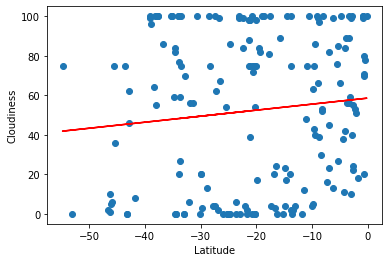

<Figure size 432x288 with 0 Axes>

In [19]:
x_axis = southern_hemishphere["Lat"]
y_axis = southern_hemishphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))

plt.show()

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The linear regression shows the relationship between the cloudiness percentage of cities and their latitude in the southern hemisphere. The relationship between Cloudiness and Latitude is positive, but weak, meaning there is no significance change to a cities cloudiness percentage and its location south of the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.01x+7.88
The r-squared correlation coefficient for this line is 0.04


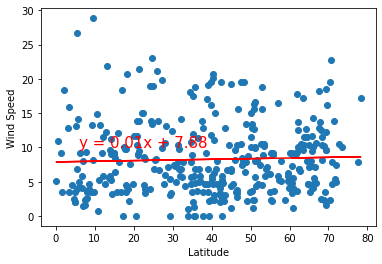

<Figure size 432x288 with 0 Axes>

In [20]:
x_axis = northern_hemishphere["Lat"]
y_axis = northern_hemishphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))

plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The linear regression shows the relationship between the wind speed of cities and their latitude in the northern hemisphere. The relationship between Wind Speed and Latitude is positive, but weak, meaning there is no significance change to a cities cloudiness percentage and its location north of the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.02x+7.33
The r-squared correlation coefficient for this line is -0.04


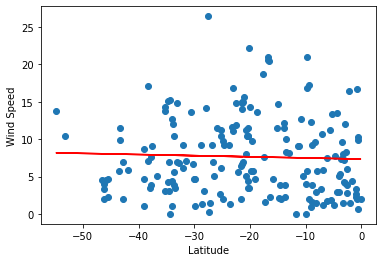

<Figure size 432x288 with 0 Axes>

In [21]:
x_axis = southern_hemishphere["Lat"]
y_axis = southern_hemishphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#print(f"The r-squared is: {rvalue**2}")
print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(slope, intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(rvalue))

plt.show()

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The linear regression shows the relationship between the wind speed of cities and their latitude in the southern hemisphere. The relationship between Wind Speed and Latitude is negative, but weak, meaning there is no significance change to a cities cloudiness percentage and its location south of the equator.